# MNDOT Traffic Analysis

## Resources:
### http://data.dot.state.mn.us/datatools/dataextract.html
### http://www.dot.state.mn.us/tmc/trafficinfo/downloads/adr.pdf

## Sections:

### Bot Construction
#### Currently running on Heroku and emailing us updated info
#### This will be updated after class and automated to continue to report live reporting

### Incident Analysis
#### Construction, Accidents, Weather
#### Currently reporting in charts and tables, eventually incororating with maps and live data

### Historical MNDOT Analysis
#### Analysis of 35W traffic flow including on and off ramps
#### Analysis of how traffic flows in and out of MPLS (HWY 94, HWY 35, HWY 394)

In [19]:
############################################################
# Import Dependencies
############################################################

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.dates as mdates
import os

from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

from ipywidgets import *
from IPython.display import display

# Bot to pull live info from MNDOT

In [20]:
###############
# Add Heroku Bot Program and Info

# Incident Analysis using MNDOT Data

In [21]:
######################################################
# Importing Live Data for Incident Analysis
######################################################

# Import CSV files into a data frame
Crash_Data_df = pd.read_csv("Data/crash_data_2.csv",encoding='utf-8')
                            
#split date column
Crash_Data_df[["Day", "Month", "DayNum","Time","Zone","Year"]] = Crash_Data_df["Date"].str.split(" ", n = 6, expand = True) 

#define max and min dates
d_max=Crash_Data_df["Date"].min()
d_min=Crash_Data_df["Date"].max()

#split name column
Crash_Data_df[["A","B"]] = Crash_Data_df["Name"].str.split("_|2018100", n = 2, expand = True) 

#Drop time zone
Crash_Data_df.drop(['Zone'], axis = 1, inplace = True)
Crash_Data_df.reset_index(drop=True)

# group by unnamed column
Crash_Data_df = Crash_Data_df.loc[Crash_Data_df['Unnamed: 0'] == 0, :]

#del columns
del Crash_Data_df['Unnamed: 0']
del Crash_Data_df['Name']
del Crash_Data_df['A']

Crash_Data_df = Crash_Data_df.loc[Crash_Data_df['B'] != 9954815, :]

Crash_Data_df = Crash_Data_df.dropna(how='any')
Crash_Data_df.drop_duplicates(subset=['Time'], keep=False)
Crash_Data_df.sort_values(by=['B'])
Crash_Data_df.reset_index(drop=True)
Crash_Data_df = Crash_Data_df.rename(columns={'B':'ID','Date':'DATE','Direction':'DIRECTION','Road':'ROAD','Location':'LOCATION','Event':'EVENT','Day':'DAY','Month':'MONTH','DayNum':'DAYNUM','Time':'TIME','Year':'YEAR'})

Crash_Data_df.set_index('ID', inplace=True,drop=True)

Crash_Data_df.to_csv("Data/crash_data_check.csv", index=False, header=True)
Crash_Data_df.drop_duplicates()

Crash_Data_df.groupby("ID").filter(lambda x: len(x) > 1)

Crash_Data_df.to_csv("Data/crash_data_filtered.csv", index=True, header=True)

######################################################################################################

Crash_Data = "Data/crash_data_filtered.csv"
Crash_Data_df = pd.read_csv(Crash_Data)
Crash_Data_df.drop_duplicates(subset=['DAYNUM'][0], keep=False)
#Crash_Data_df.drop_duplicates(subset=['TIME'], keep=False, inplace=True)
Crash_Data_df.head(3)

######################################################################################################

Crash_Data = "Data/crash_data_filtered.csv"
Crash_Data_df = pd.read_csv(Crash_Data)
Crash_Data_df.head(2)

,ID,DATE,DIRECTION,ROAD,LOCATION,EVENT,DAY,MONTH,DAYNUM,TIME,YEAR
0,9954815,Sun Oct 07 03:35:22 CDT 2018,WB,T.H.62,@ T.H.100 NB,CRASH,Sun,Oct,7,03:35:22,2018
1,9954815,Sun Oct 07 03:35:22 CDT 2018,WB,T.H.62,@ T.H.100 NB,CRASH,Sun,Oct,7,03:35:22,2018


In [22]:
######################################################
# BUG WITH MACRO - NEEDS TO BE FIXED STILL

#Crash_Data_df.dtypes
import win32com.client 

run_xl = win32com.client.Dispatch('Excel.Application')
run_xl.Workbooks.Open('Data/CrashDataFilterMacro.xlsm')
run_xl.Application.Run("Macro1")
run_xl.Application.Quit()
 
#PRINT FINAL COMPLETED MESSAGE#
print("Macro refresh completed!")
############################################
# BUG - This needs to be fixed once the macro is fixed.
# right now all the incident visuals are referencing the un-macro'd data
###########################################################################

Crash_Data = "Data/crash_data_filtered.csv"
Crash_Data_df = pd.read_csv(Crash_Data)
Crash_Data_df.head(2)

com_error: (-2147352567, 'Exception occurred.', (0, 'Microsoft Excel', "Sorry, we couldn't find Data/CrashDataFilterMacro.xlsm. Is it possible it was moved, renamed or deleted?", 'xlmain11.chm', 0, -2146827284), None)

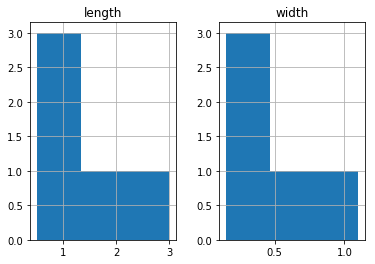

In [23]:
df = pd.DataFrame({
...     'length': [1.5, 0.5, 1.2, 0.9, 3],
...     'width': [0.7, 0.2, 0.15, 0.2, 1.1]
...     }, index= ['pig', 'rabbit', 'duck', 'chicken', 'horse'])
>>> hist = df.hist(bins=3)

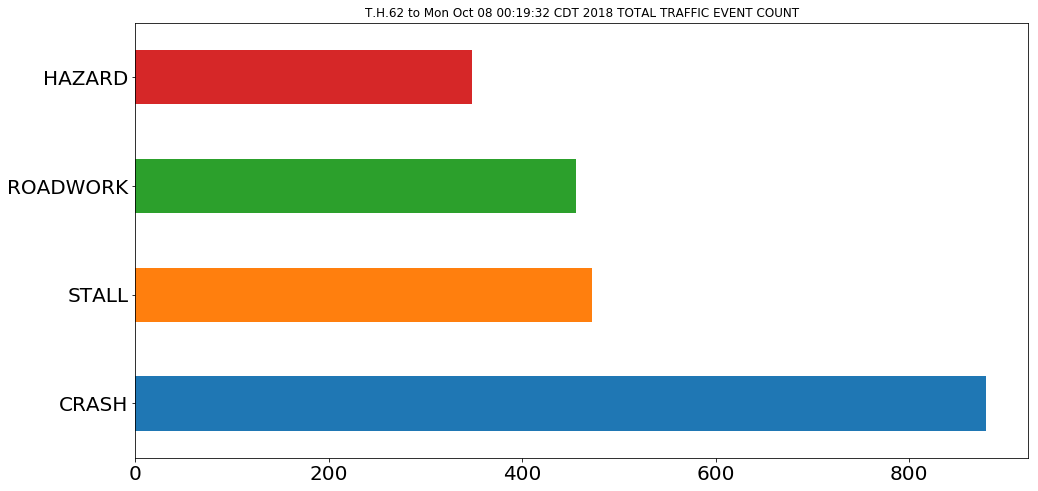

In [24]:
fontsize2use = 15

fontprop = fm.FontProperties(size=fontsize2use)
fig = plt.figure(figsize=(20,10))
plt.xticks(fontsize=fontsize2use)  
plt.yticks(fontsize=fontsize2use)

Crash_Data_df['EVENT'].value_counts().plot(kind='barh',  title=(f'{d_min} to {d_max} TOTAL TRAFFIC EVENT COUNT'), fontsize=20, stacked=True, figsize=[16,8])

plt.savefig("Images/Event_Count_Summary.png")
plt.show()

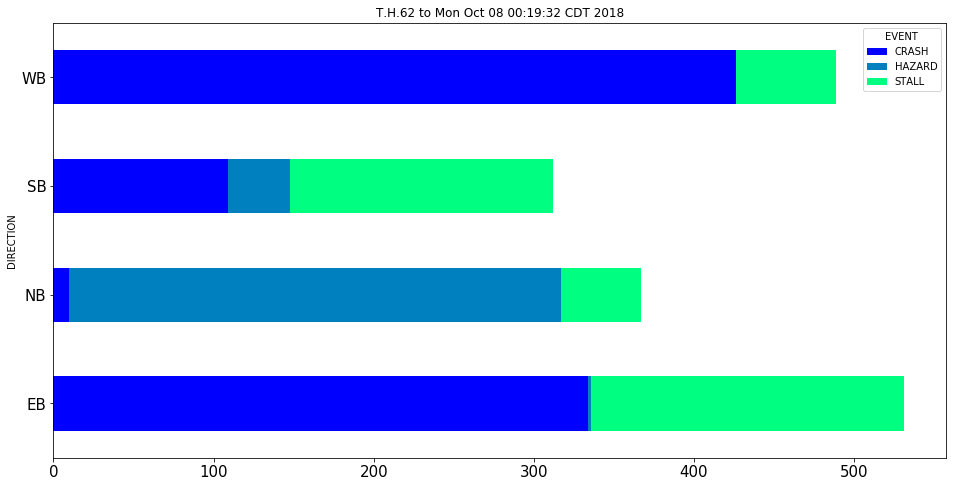

In [25]:
Omit_ROADWORK_Crash_Data_df = Crash_Data_df.loc[Crash_Data_df["EVENT"] != "ROADWORK", :]
flights_by_carrier = Omit_ROADWORK_Crash_Data_df.pivot_table(index='DIRECTION', columns='EVENT', values='DAY', aggfunc='count')
flights_by_carrier.plot(kind='barh', stacked=True,fontsize=15, title=(f'{d_min} to {d_max}'), figsize=[16,8], colormap='winter')

plt.savefig("Images/Crash_Hazards_Stalls_Count.png")

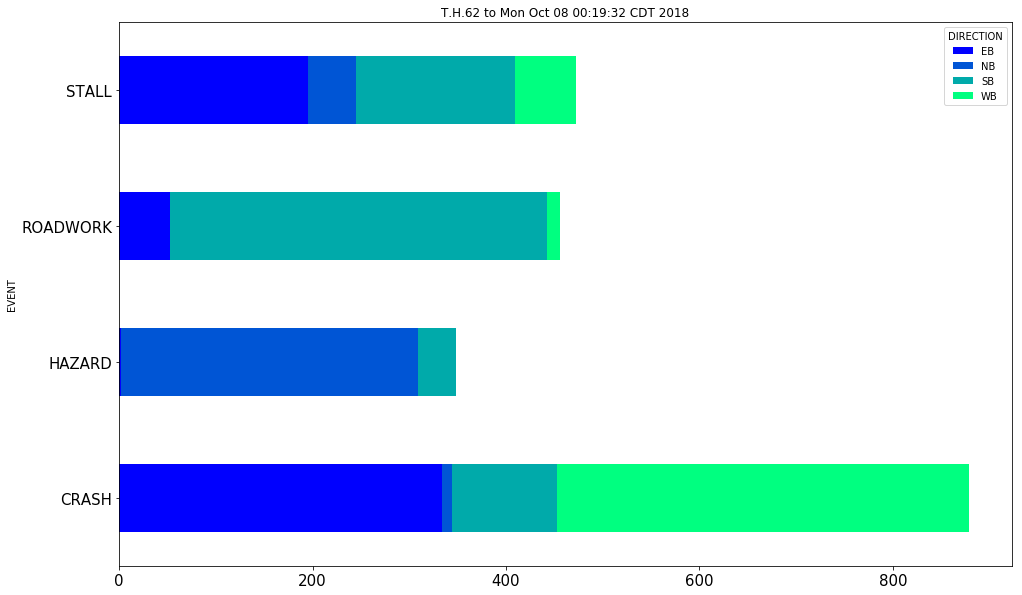

In [26]:
flights_by_carrier = Crash_Data_df.pivot_table(index='EVENT', columns='DIRECTION', values='DAY', aggfunc='count')
flights_by_carrier.plot(kind='barh', stacked=True, title=(f'{d_min} to {d_max}'),fontsize=15, figsize=[16,10], colormap='winter')
plt.savefig("Images/Crash_Hazards_Stalls_by_Direction_Count.png")

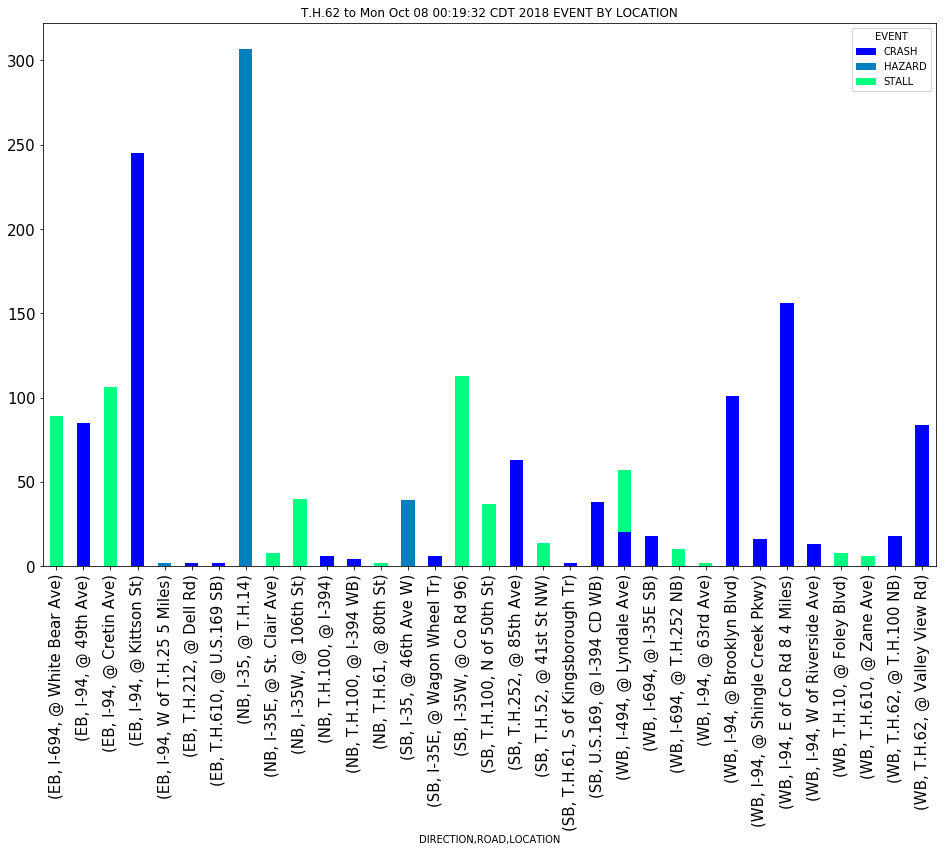

In [27]:
Omit_ROADWORK_Crash_Data_df = Crash_Data_df.loc[Crash_Data_df["EVENT"] != "ROADWORK", :]

group_by_direction_by_event = Omit_ROADWORK_Crash_Data_df.groupby(['DIRECTION','ROAD','LOCATION','EVENT'])

group_by_direction_by_event=group_by_direction_by_event.size().unstack()

group_by_direction_by_event.plot(kind='bar', title=(f'{d_min} to {d_max} EVENT BY LOCATION'), fontsize=15, figsize=[16,10], stacked=True, colormap='winter') # area plot
plt.savefig("Images/Crash_Hazards_Stalls_by_Location_Count.png")

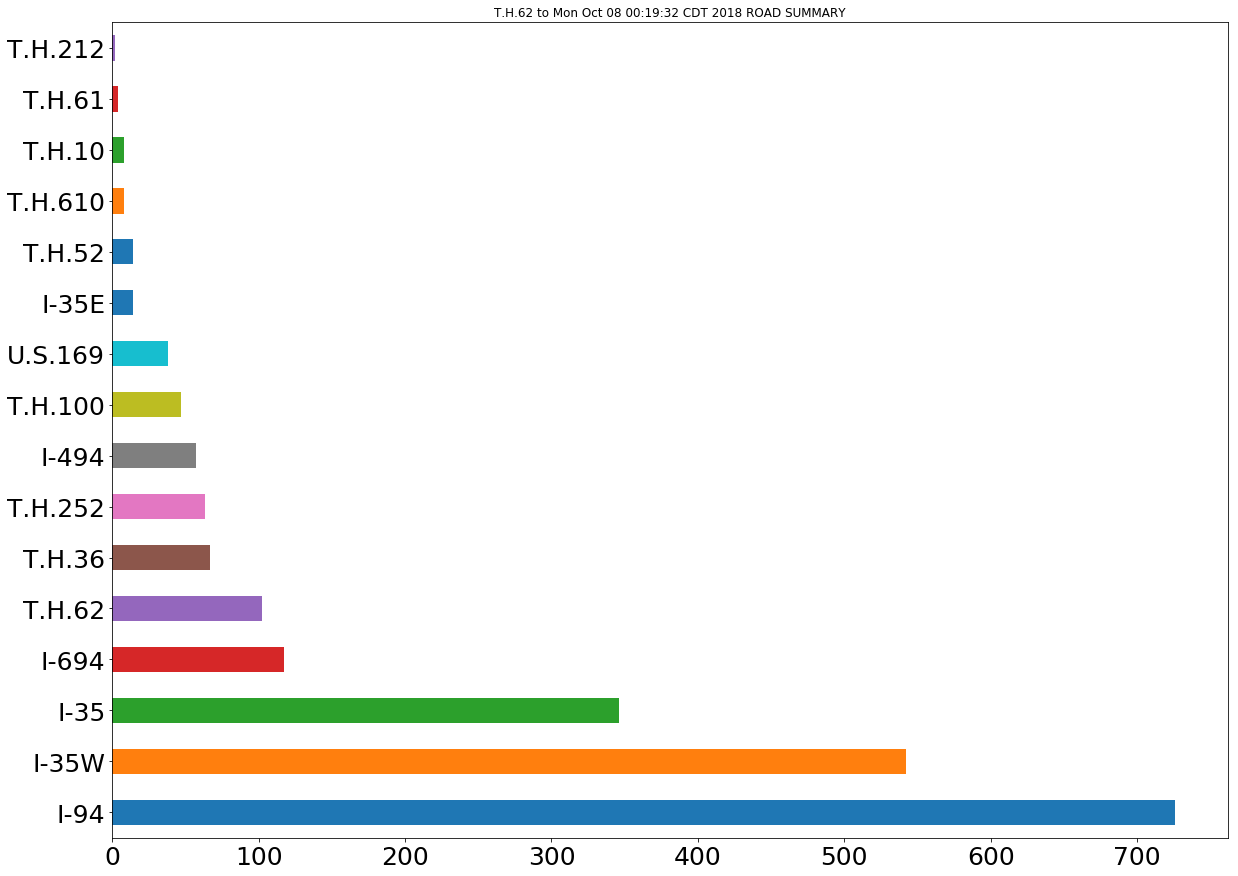

In [28]:
fontsize2use = 25

fontprop = fm.FontProperties(size=fontsize2use)
fig = plt.figure(figsize=(20,15))
plt.xticks(fontsize=fontsize2use)  
plt.yticks(fontsize=fontsize2use)

Crash_Data_df['ROAD'].value_counts().plot(kind='barh',title=(f'{d_min} to {d_max} ROAD SUMMARY'))

plt.savefig("Images/Crash_Hazards_Stalls_by_Road_Count.png")

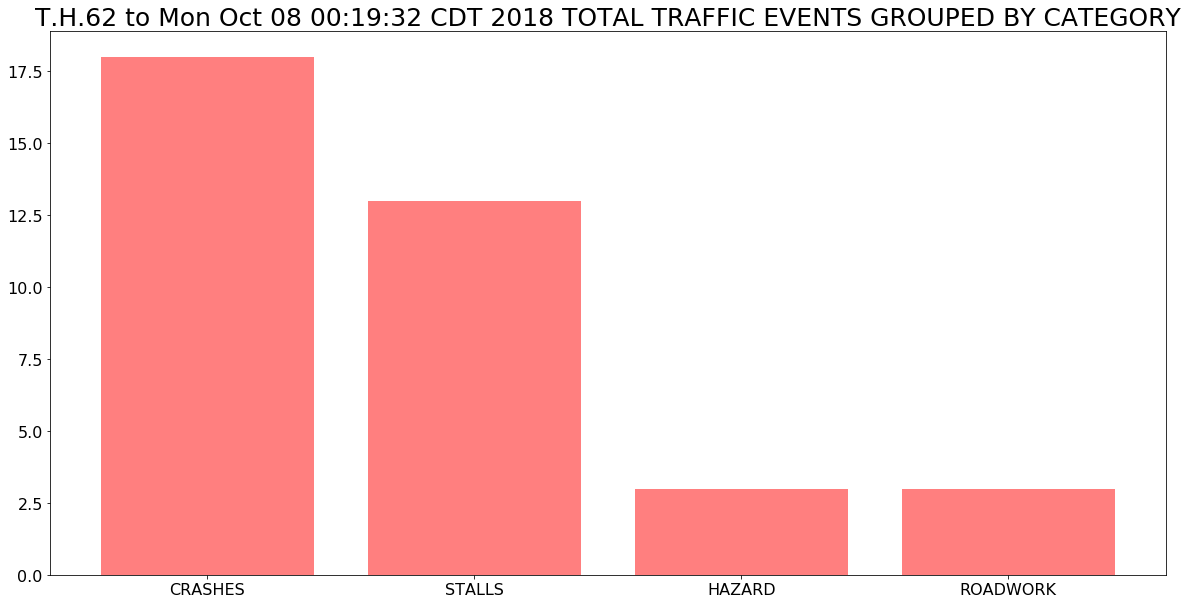

In [29]:
#Filter Event Data for Evenet Summary Chart and Count the Events
Crash_Event = Crash_Data_df.loc[Crash_Data_df["EVENT"] == "CRASH", :]
grouped_Crash_Event = Crash_Event.groupby(['ROAD','LOCATION','DIRECTION'])
grouped_Crash_Event = pd.DataFrame(grouped_Crash_Event["EVENT"].count())
Total_CRASHES=len(grouped_Crash_Event)

Hazard_Event = Crash_Data_df.loc[Crash_Data_df["EVENT"] == "HAZARD", :]
grouped_Hazard_Event = Hazard_Event.groupby(['ROAD','LOCATION','DIRECTION'])
grouped_Hazard_Event = pd.DataFrame(grouped_Hazard_Event["EVENT"].count())
Total_HAZARDS=len(grouped_Hazard_Event)

Roadwork_Event = Crash_Data_df.loc[Crash_Data_df["EVENT"] == "ROADWORK", :]
grouped_Roadwork_Event =Roadwork_Event.groupby(['ROAD','LOCATION','DIRECTION'])
grouped_Roadwork_Event = pd.DataFrame(grouped_Roadwork_Event["EVENT"].count())
Total_ROADWORK=len(grouped_Roadwork_Event)

Stall_Event = Crash_Data_df.loc[Crash_Data_df["EVENT"] == "STALL", :]
grouped_Stall_Event =Stall_Event.groupby(['ROAD','LOCATION','DIRECTION'])
grouped_Stall_Event = pd.DataFrame(grouped_Stall_Event["EVENT"].count())
Total_STALLS=len(grouped_Stall_Event)

# use matplotlib to make a bar chart
EVENTS=["CRASHES", "STALLS", "HAZARD", "ROADWORK"]
Event_COUNT=[Total_CRASHES,Total_STALLS,Total_HAZARDS,Total_ROADWORK]

fontsize2use = 16
fontsize3use = 25

fig = plt.figure(figsize=(20,10))
plt.xticks(fontsize=fontsize2use)  
plt.yticks(fontsize=fontsize2use)    
fontprop = fm.FontProperties(size=fontsize2use)

plt.title((f'{d_min} to {d_max} TOTAL TRAFFIC EVENTS GROUPED BY CATEGORY') ,fontsize=fontsize3use)

plt.bar(EVENTS,Event_COUNT, color=('r'), alpha=0.5, align="center")
    
plt.savefig("Images/Crash_By_Event.png")
plt.show()

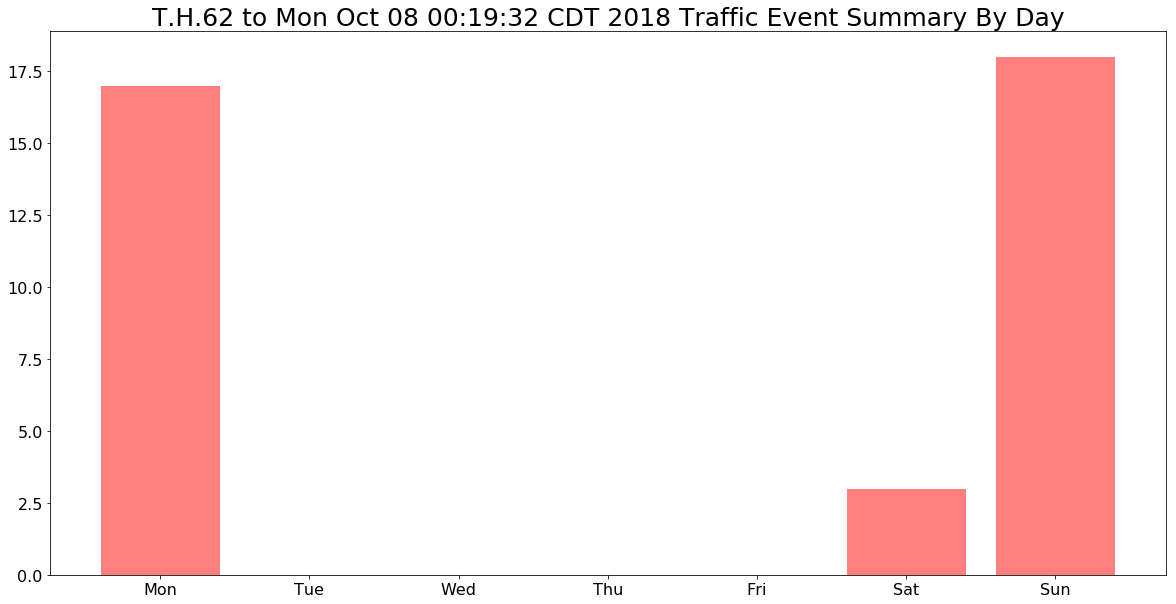

In [30]:
Roadwork_Event = Crash_Data_df.loc[Crash_Data_df["EVENT"] == "ROADWORK", :]
grouped_Roadwork_Event =Roadwork_Event.groupby(['ROAD','LOCATION','DIRECTION'])
grouped_Roadwork_Event = pd.DataFrame(grouped_Roadwork_Event["EVENT"].count())
Total_ROADWORK=len(grouped_Roadwork_Event)

#Filter Event Data for Evenet Summary Chart and Count the Events
Crash_Event_Mon = Crash_Data_df.loc[Crash_Data_df["DAY"] == "Mon", :]
grouped_Crash_Event_Mon = Crash_Event_Mon.groupby(['ROAD','LOCATION','DIRECTION'])
grouped_Crash_Event_Mon = pd.DataFrame(grouped_Crash_Event_Mon["EVENT"].count())
Total_Mon_CRASHES=len(grouped_Crash_Event_Mon)

Crash_Event_Tue = Crash_Data_df.loc[Crash_Data_df["DAY"] == "Tue", :]
grouped_Crash_Event_Tue = Crash_Event_Tue.groupby(['ROAD','LOCATION','DIRECTION'])
grouped_Crash_Event_Tue = pd.DataFrame(grouped_Crash_Event_Tue["EVENT"].count())
Total_Tue_CRASHES=len(grouped_Crash_Event_Tue)

Crash_Event_Wed = Crash_Data_df.loc[Crash_Data_df["DAY"] == "Wed", :]
grouped_Crash_Event_Wed = Crash_Event_Wed.groupby(['ROAD','LOCATION','DIRECTION'])
grouped_Crash_Event_Wed = pd.DataFrame(grouped_Crash_Event_Wed["EVENT"].count())
Total_Wed_CRASHES=len(grouped_Crash_Event_Wed)

Crash_Event_Thu = Crash_Data_df.loc[Crash_Data_df["DAY"] == "Thu", :]
grouped_Crash_Event_Thu = Crash_Event_Thu.groupby(['ROAD','LOCATION','DIRECTION'])
grouped_Crash_Event_Thu = pd.DataFrame(grouped_Crash_Event_Thu["EVENT"].count())
Total_Thu_CRASHES=len(grouped_Crash_Event_Thu)

Crash_Event_Fri = Crash_Data_df.loc[Crash_Data_df["DAY"] == "Fri", :]
grouped_Crash_Event_Fri = Crash_Event_Fri.groupby(['ROAD','LOCATION','DIRECTION'])
grouped_Crash_Event = pd.DataFrame(grouped_Crash_Event_Fri["EVENT"].count())
Total_Fri_CRASHES=len(grouped_Crash_Event_Fri)

Crash_Event_Sat = Crash_Data_df.loc[Crash_Data_df["DAY"] == "Sat", :]
grouped_Crash_Event_Sat = Crash_Event_Sat.groupby(['ROAD','LOCATION','DIRECTION'])
grouped_Crash_Event_Sat = pd.DataFrame(grouped_Crash_Event_Sat["EVENT"].count())
Total_Sat_CRASHES=len(grouped_Crash_Event_Sat)

Crash_Event_Sun = Crash_Data_df.loc[Crash_Data_df["DAY"] == "Sun", :]
grouped_Crash_Event_Sun = Crash_Event_Sun.groupby(['ROAD','LOCATION','DIRECTION'])
grouped_Crash_Event_Sun = pd.DataFrame(grouped_Crash_Event_Sun["EVENT"].count())
Total_Sun_CRASHES =len(grouped_Crash_Event_Sun)

# use matplotlib to make a bar chart of crash data by location
EVENTS_BY_DAY=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
Event_COUNT=[Total_Mon_CRASHES,Total_Tue_CRASHES,Total_Wed_CRASHES,
             Total_Thu_CRASHES,Total_Fri_CRASHES,Total_Sat_CRASHES,Total_Sun_CRASHES]

fontsize2use = 16
fontsize3use = 25

fig = plt.figure(figsize=(20,10))
plt.xticks(fontsize=fontsize2use)  
plt.yticks(fontsize=fontsize2use)    
fontprop = fm.FontProperties(size=fontsize2use)

plt.title((f'{d_min} to {d_max} Traffic Event Summary By Day') ,fontsize=fontsize3use)

plt.bar( EVENTS_BY_DAY,Event_COUNT, color=('r'), alpha=0.5, align="center")
  
plt.savefig("Images/Crash_By_Event_By_Day.png")

plt.show()

Crash count by days :2


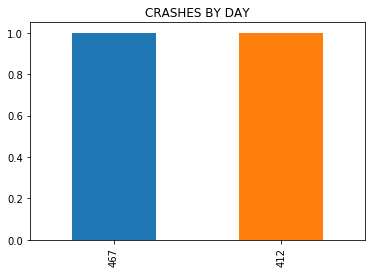

In [31]:
Crash_data_by_day = Crash_Data_df[Crash_Data_df['EVENT'] == 'CRASH']
Crash_count=Crash_data_by_day['DAY'].value_counts()
Crash_days=len(Crash_data_by_day['DAY'].value_counts())
print(f'Crash count by days :{Crash_days}')

Crash_data_by_day['DAY'].value_counts().value_counts().plot(kind='bar', title='CRASHES BY DAY')

plt.savefig("Images/Crash_Count_By_Day.png")


Roadwork count by days :2


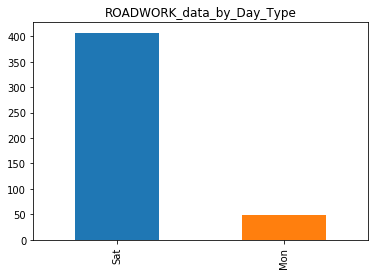

In [32]:
Roadwork_data_by_day= Crash_Data_df[Crash_Data_df['EVENT'] == 'ROADWORK']
Roadwork_Count=Roadwork_data_by_day['DAY'].value_counts()
Roadwork_days=len(Crash_data_by_day['DAY'].value_counts())
print(f'Roadwork count by days :{Roadwork_days}')


Roadwork_data_by_day['DAY'].value_counts().plot(kind='bar', title='ROADWORK_data_by_Day_Type')
plt.savefig("Images/Roadwork_Count_By_Day.png")

Stall count by days : 13


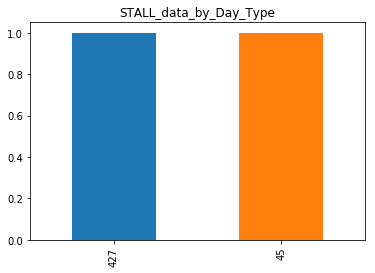

In [33]:
Stall_data_by_day= Crash_Data_df.loc[Crash_Data_df["EVENT"] == "STALL", :]
grouped_Stall_Event =Stall_Event.groupby(["ROAD","LOCATION","DIRECTION"])
grouped_Stall_Event = pd.DataFrame(grouped_Stall_Event["EVENT"].count())
Stall_days=len(grouped_Stall_Event)
print(f'Stall count by days : {Stall_days}')

Stall_data_by_day['DAY'].value_counts().value_counts().plot(kind='bar', title='STALL_data_by_Day_Type')
plt.savefig("Images/Stall_Count_By_Day.png")

Hazard count by days : 2


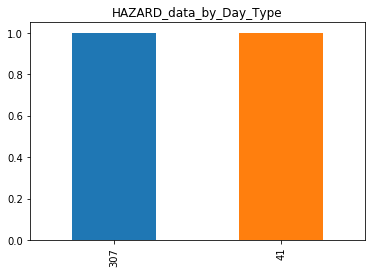

In [34]:
Hazard_data_by_day= Crash_Data_df[Crash_Data_df['EVENT'] == 'HAZARD']
Hazard_Count=Hazard_data_by_day['DAY'].value_counts()
Hazard_days=len(Crash_data_by_day['DAY'].value_counts())

print(f'Hazard count by days : {Hazard_days}')

Hazard_data_by_day['DAY'].value_counts().value_counts().plot(kind='bar', title='HAZARD_data_by_Day_Type')
plt.savefig("Images/Hazard_Count_By_Day.png")

# 35W Traffic Flow Analysis from 694 to 494

In [35]:
##########################################
# Read CSV Files
##########################################

# Sensor names, labels for SB 35W from 694 to 494
sensor_list = 'Station_Keys/Southbound_35W_StationNames.csv'
SensorList = pd.read_csv(sensor_list)
SensorDF = pd.DataFrame(SensorList)

# Oct_data from a single day showing SB 35W Traffic
oct_data = ('Archived_Data_MNDOT/SB35W_Oct_3_18_Volume_Sum_RushHours.csv')
Oct_cvs = pd.read_csv(oct_data)
OctDF = pd.DataFrame(Oct_cvs)

#Sensor names, labels for NB 35W from 494 to 694
nbsensor_list = 'Station_Keys/Northbound_35W_StationNames.csv'
nbSensorList = pd.read_csv(nbsensor_list)
NBSensorDF = pd.DataFrame(nbSensorList)

# Oct_data from a single day showing NB 35W Traffic
nboct_data = 'Archived_Data_MNDOT/NB35W_Oct_3_18_Volume_Sum_RushHours.csv'
nboct_csv = pd.read_csv(nboct_data)
NBOctDF = pd.DataFrame(nboct_csv)

mpls_csv = 'Station_Keys/MPLS_Route_StationNames.csv'
mpls_csvR = pd.read_csv(mpls_csv)
mpls_DF = pd.DataFrame(mpls_csvR)


mpls_data_csv = 'Archived_Data_MNDOT/MPLS_Entry_Exit_Volume_SpecificDates_2.csv'
dtypes = {'col1': 'str', 'col2': 'str', 'col3': 'str', 'col4': 'str', 'col5':'str', 'col6':'float', 'col7':'float'}
parse_dates = ['Date']
mpls_data = pd.read_csv(mpls_data_csv, sep=',', dtype=dtypes, parse_dates=parse_dates)
mpls_dataDF = pd.DataFrame(mpls_data)

############################################################
# Merge CSV Files to create South Bound 35W Data (SB_Data)
############################################################

#Merged SB 35W Data and Labels
SB_Data = pd.merge(SensorDF, OctDF, how = 'left', on = '1')

#Merged NB 35W Data and Labels
NB_Data = pd.merge(NBSensorDF, NBOctDF, how = 'left', on = '1')

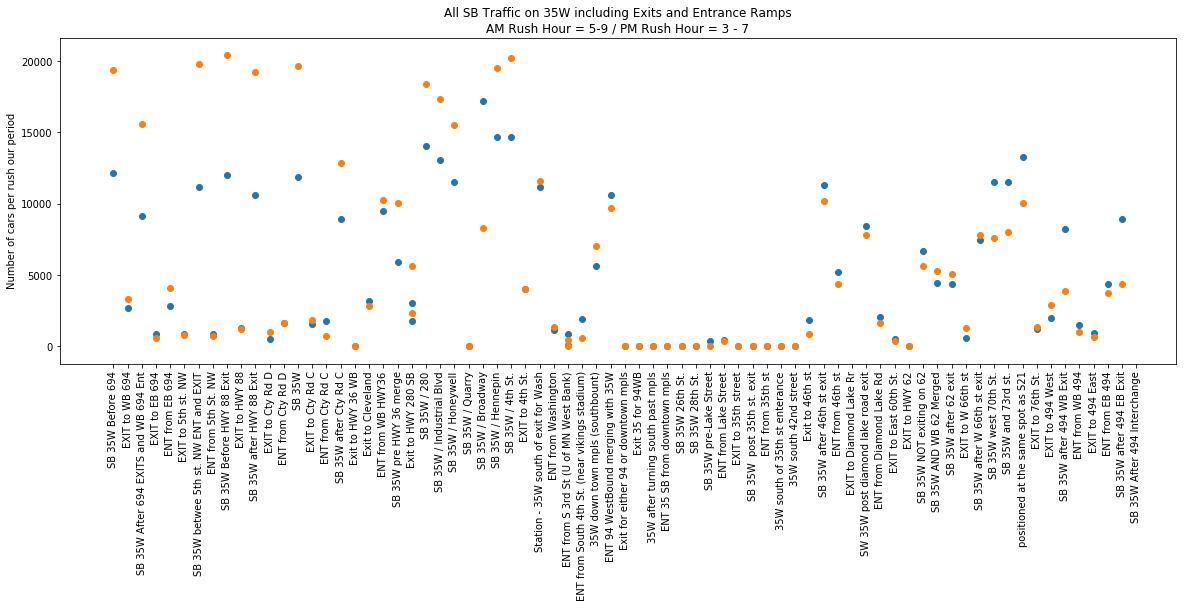

In [6]:
#####################################################
# SOUTHBOUND TRAFFIC SHOWING FLOW, ON AND OFF RAMPS
#####################################################

y1 = SB_Data['AM Rush']
y2 = SB_Data['PM Rush']
X_Axis = SB_Data['Label']

# Figure Settings
plt.figure(figsize=(20,6))
plt.xticks(rotation=90)

# Figure Labels
plt.title("All SB Traffic on 35W including Exits and Entrance Ramps\nAM Rush Hour = 5-9 / PM Rush Hour = 3 - 7")
plt.ylabel("Number of cars per rush our period")

# Scatter Plot
plt.scatter(X_Axis, y1)
plt.scatter(X_Axis, y2)

plt.show()

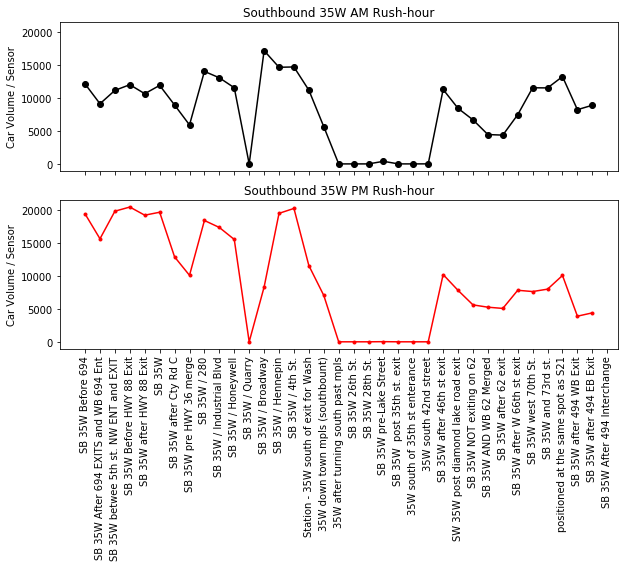

In [7]:
##########################################
# SOUTHBOUND 35W TRAFFIC - FLOW ONLY
##########################################

SB35W_Flow = SB_Data.loc[SB_Data['Type']=='Flow']

# Inputs
y1 = SB35W_Flow ['AM Rush']
y2 = SB35W_Flow['PM Rush']
x1 = SB35W_Flow['Label']
x2 = SB35W_Flow['Label']

# Create two subplots sharing y axis
fig, (ax1, ax2) = plt.subplots(2, sharex = True, sharey=True, figsize=(10,6))

# AM Rush-hour
ax1.plot(x1, y1, 'ko-')
ax1.set(title='Southbound 35W AM Rush-hour', ylabel='Car Volume / Sensor')

# PM Rush-hour
ax2.plot(x2, y2, 'r.-')
ax2.set(title='Southbound 35W PM Rush-hour', ylabel='Car Volume / Sensor')

# Rotate xticks (reminder both images are sharing the X-axis labels)
plt.xticks(rotation=90)

plt.show()

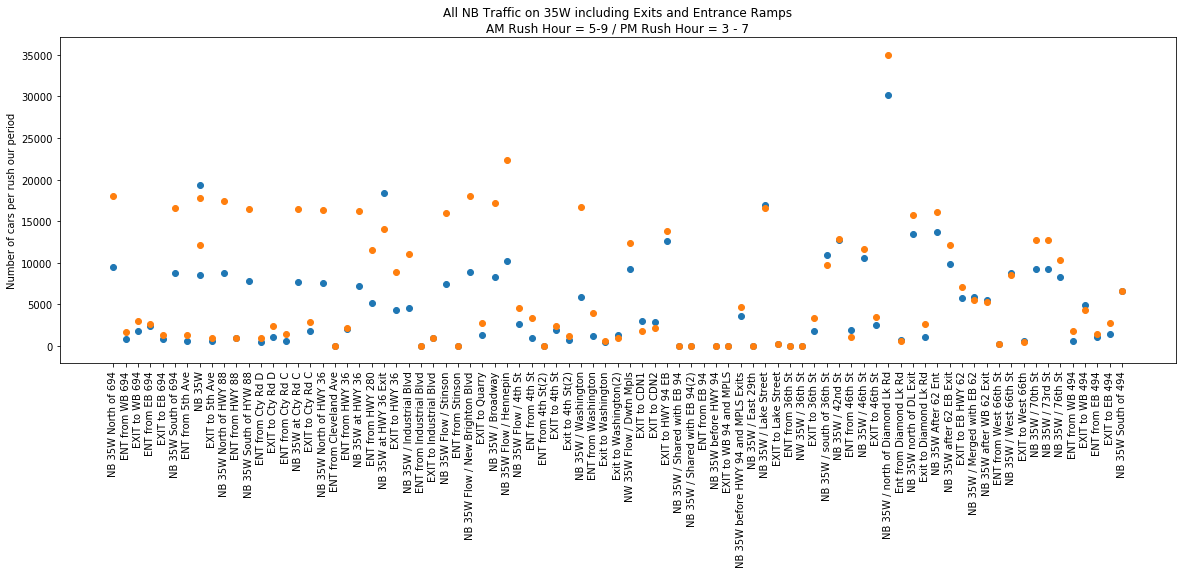

In [8]:
#####################################################
# NORTHBOUND TRAFFIC SHOWING FLOW, ON AND OFF RAMPS
#####################################################

y1 = NB_Data['AM_RushHour']
y2 = NB_Data['PM_RushHour']
X_Axis = NB_Data['Label']

# Figure Settings
plt.figure(figsize=(20,6))
plt.xticks(rotation=90)

# Figure Labels
plt.title("All NB Traffic on 35W including Exits and Entrance Ramps\nAM Rush Hour = 5-9 / PM Rush Hour = 3 - 7")
plt.ylabel("Number of cars per rush our period")

# Scatter Plot
plt.scatter(X_Axis, y1)
plt.scatter(X_Axis, y2)

plt.show()

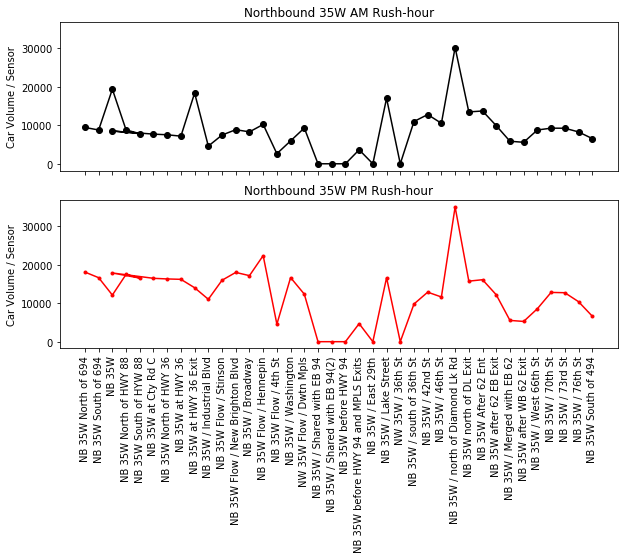

In [9]:
##########################################
# NORTHBOUND 35W TRAFFIC - FLOW ONLY
##########################################

NB35W_Flow = NB_Data.loc[NB_Data['Type']=='Flow']

# Inputs
y1 = NB35W_Flow ['AM_RushHour']
y2 = NB35W_Flow['PM_RushHour']
x1 = NB35W_Flow['Label']
x2 = NB35W_Flow['Label']

# Create two subplots sharing y axis
fig, (ax1, ax2) = plt.subplots(2, sharex = True, sharey=True, figsize=(10,6))

# AM Rush-hour
ax1.plot(x1, y1, 'ko-')
ax1.set(title='Northbound 35W AM Rush-hour', ylabel='Car Volume / Sensor')

# PM Rush-hour
ax2.plot(x2, y2, 'r.-')
ax2.set(title='Northbound 35W PM Rush-hour', ylabel='Car Volume / Sensor')

# Rotate xticks (reminder both images are sharing the X-axis labels)
plt.xticks(rotation=90)

plt.show()

In [10]:
################################################################
# Identify 35W Southbound EXITS WITH HIGHEST volume of traffic
################################################################

SB35W_Exits = SB_Data.loc[SB_Data['Type']!='Flow']
SB35W_ExitsDF = SB35W_Exits[['Label', 'Type', 'AM Rush']]
SB35W_ExitsHigh = SB35W_ExitsDF.sort_values(by='AM Rush', ascending=False).head(5)

SB35W_ExitsDFpm = SB35W_Exits[['Label', 'Type', 'PM Rush']]
SB35W_ExitsHighpm = SB35W_ExitsDFpm.sort_values(by='PM Rush', ascending=False).head(5)

display_side_by_side(SB35W_ExitsHigh, SB35W_ExitsHighpm)

,Label,Type,AM Rush
37,ENT 94 WestBound merging with 35W,On,10594.0
19,ENT from WB HWY36,On,9510.0
53,ENT from 46th st,On,5214.0
72,ENT from EB 494,On,4377.0
30,EXIT to 4th St.,Exit,4012.0
,Label,Type,PM Rush
19,ENT from WB HWY36,On,10265.0
37,ENT 94 WestBound merging with 35W,On,9691.0
22,Exit to HWY 280 SB,Exit,5616.0
53,ENT from 46th st,On,4369.0


In [11]:
################################################################
# Identify 35W Northbound EXITS WITH HIGHEST volume of traffic
################################################################

NB35W_Exits = NB_Data.loc[NB_Data['Type']!='Flow']
NB35W_ExitsDF = NB35W_Exits[['Label', 'Type', 'AM_RushHour']]
NB35W_ExitsHigh = NB35W_ExitsDF.sort_values(by='AM_RushHour', ascending=False).head(5)

NB35W_ExitsDFpm = NB35W_Exits[['Label', 'Type', 'PM_RushHour']]
NB35W_ExitsHighpm = NB35W_ExitsDFpm.sort_values(by='PM_RushHour', ascending=False).head(5)

display_side_by_side(NB35W_ExitsHigh, NB35W_ExitsHighpm)

,Label,Type,AM_RushHour
46,EXIT to HWY 94 EB,Exit,12572.0
70,EXIT to EB HWY 62,Exit,5771.0
22,ENT from HWY 280,On,5150.0
80,EXIT to WB 494,Exit,4990.0
24,EXIT to HWY 36,Exit,4317.0
,Label,Type,PM_RushHour
46,EXIT to HWY 94 EB,Exit,13824.0
22,ENT from HWY 280,On,11584.0
24,EXIT to HWY 36,Exit,8880.0
70,EXIT to EB HWY 62,Exit,7072.0


# Analysis of MPLS Entry/Exit Points

## 35W, 94, and 394

In [12]:
##################################
# Packers at Vikings 10/15/2017
##################################

VikPak_DF = mpls_dataDF.loc[mpls_dataDF['Event Label']=='Packers at Vikings']
VikPak = VikPak_DF[['Volume', 'St Label', 'Direction', 'Freeway Tag']]
VikPak_to = VikPak.loc[VikPak['Direction']=='To']
VikPak_Tosorted = VikPak_to.sort_values(by = 'Freeway Tag', ascending = True)

VikPak_From = VikPak.loc[VikPak['Direction']=='From']
VikPak_Fromsorted = VikPak_From.sort_values(by='Freeway Tag', ascending = True)
display_side_by_side(VikPak_Tosorted, VikPak_Fromsorted)

,Volume,St Label,Direction,Freeway Tag
61,28958,EB 94 to dwtn,To,1
69,33427,NB 35W to dwtn,To,2
64,48752,EB 394 to dwtn,To,3
65,57976,WB 94 to dwtn,To,4
68,53712,SB 35W to dwtn,To,5
,Volume,St Label,Direction,Freeway Tag
60,28521,WB 94 from dwtn,From,1
62,37519,SB 35W from dwtn,From,2
63,47075,WB 394 from dwtn,From,3
66,57503,EB 94 from dwtn,From,4


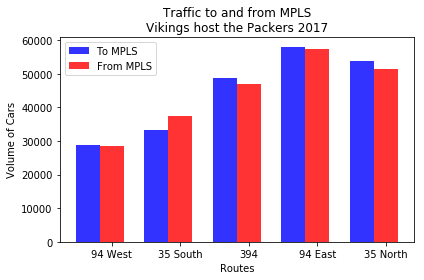

In [13]:
#########################################
#Visualization of Vikes Pac game 2017
#########################################

n_groups = 5
VikPak_trafficTo = list(VikPak_Tosorted['Volume'])
VikPak_TrafficFr = list(VikPak_Fromsorted['Volume'])

fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, VikPak_trafficTo, bar_width,
                alpha = opacity,
                color = 'b',
                label = 'To MPLS')
rects2 = plt.bar(index+bar_width, VikPak_TrafficFr, bar_width,
                alpha = opacity,
                color = 'r',
                label = 'From MPLS')

plt.xlabel('Routes')
plt.ylabel('Volume of Cars')
plt.title('Traffic to and from MPLS\nVikings host the Packers 2017')
plt.xticks(index + bar_width, ('94 West', '35 South', '394', '94 East', '35 North'))
plt.legend()

plt.tight_layout()
plt.show()

In [14]:
try:
    ls=[EE_df]
    del EE_df
    del ls
except  NameError:
     pass

EE_df=pd.read_csv("./Archived_Data_MNDOT/MPLS_Entry_Exit_Volume_SpecificDates.csv")

# len(EE_df)
# set(list(EE_df["Sensor"].values))
# EE_df.columns
def modi_Twins_Opener(x):
    try:
        if (x.split()[1]=="Twins")and(x.split()[2]=="Opener"):
            return '2018 Twins Opener'
        else:
            return x
    except:
        return x
            
    
EE_df["Event Label_2"]=EE_df["Event Label"].apply(modi_Twins_Opener);
EE_df.drop(columns=["Event Label"],inplace=True);
EE_df.rename(columns={"Event Label_2":"Event Label"},inplace=True);

#EE_df.set_index(["Event Label","Sensor"]);
def FromOrTodowntown(x):
    def fromto(y):
        if y=="from":
            return "out"
        else:
            return "in"
    return fromto(x.split()[-2])
def road(x):
    a=list(x.split())[0:2]
    return ' '.join(a[::-1])

EE_df["Direction(from/to)"]=EE_df["St Label"].apply(FromOrTodowntown);
EE_df["road"]=EE_df["St Label"].apply(road);

EE_df.head();
events=list(EE_df["Event Label"].unique());
events=list(EE_df["Event Label"].unique());

EE_df["sensor_name"]=EE_df["Sensor"]+'('+EE_df["road"]+")";
sensors=list(EE_df["sensor_name"].unique())

EE_df["name_sensor"]=EE_df["road"]+'('+EE_df[ "Sensor"]+")";


sensors=list(EE_df["sensor_name"].unique());
sensors2=list(EE_df["name_sensor"].unique());
len(events);
EE_df["sensor_fromto"]=EE_df["road"]+","+EE_df["Sensor"]+','+EE_df["Direction(from/to)"];
EE_df;

In [15]:
#https://github.com/jupyter-widgets/ipywidgets/issues/1582
from IPython.display import display
import numpy as np
from ipywidgets import *
import matplotlib.pyplot as plt

def plot_flow_event(b):
    Num_of_event=events.index(b)
    aa=EE_df.groupby(["Event Label"]).get_group(b).sort_values(by="road");
    #aa=aa[aa["road"]=="35W"]
    fig, ax = plt.subplots(figsize=(15,5))
    ax.bar(aa["Sensor"],aa["Volume"])
    ax.set_xticklabels(aa['road'])
    ax.set_ylabel("vehicle flow")
    ax.set_title(b)

w1=dict(b=widgets.Dropdown(options=events,value=events[0],description='event',disabled=False))

output = interactive_output(plot_flow_event, w1)
box = VBox([*w1.values(), output])
display(box)

In [16]:
def plot_flow_sensor(b):
    Num_of_sensor=sensors.index(b)
    aa=EE_df.groupby(["sensor_name"]).get_group(b).sort_values(by="Event Label");
    #aa=aa[aa["road"]=="35W"]
    fig, ax = plt.subplots(figsize=(15,3))
    ax.bar(aa["Event Label"],aa["Volume"])
    ax.set_xticklabels(aa["Event Label"],rotation=45,ha="right")
    ax.set_ylabel("vehicle flow")
    ax.set_title(b)

w2=dict(b=widgets.Dropdown(options=sensors,value=sensors[0],description='Sensor',disabled=False))

output = interactive_output(plot_flow_sensor, w2)
box = VBox([*w2.values(), output])
display(box)

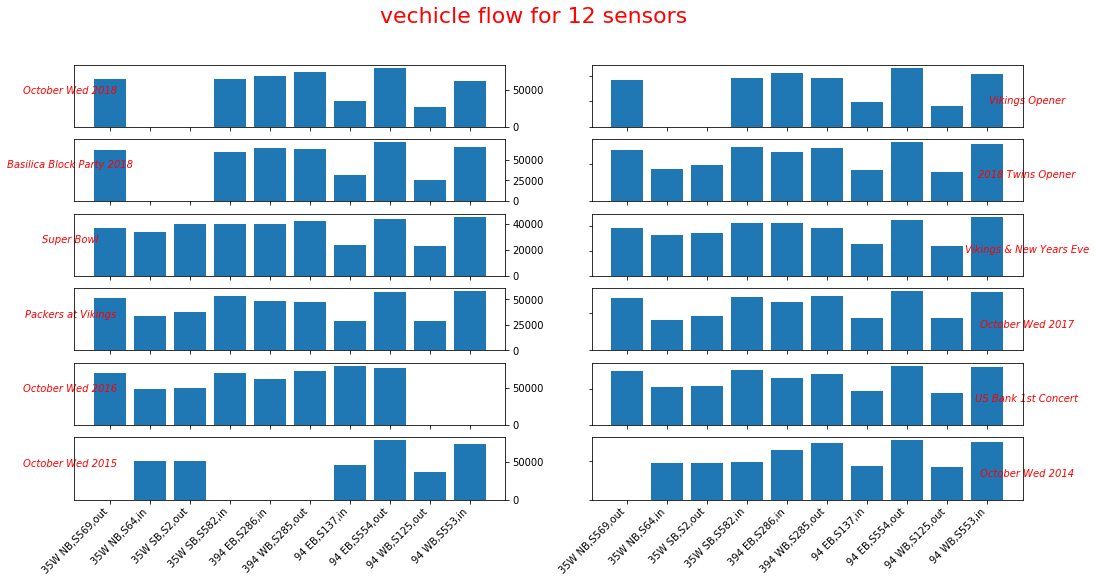

In [17]:
def plot_flow_event_all(b,ax):
    Num_of_event=events.index(b)
    b1,b2=(int(Num_of_event/2),Num_of_event%2)
    aa=EE_df.groupby(["Event Label"]).get_group(b).sort_values(by="road");
    #aa=aa[aa["road"]=="35W"]
    #fig, ax = plt.subplots(figsize=(15,5))
    ax[b1,b2].bar(aa["Sensor"],aa["Volume"])
    ax[b1,b2].set_xticklabels(aa["sensor_fromto"],rotation=45,ha="right")
    if (b2==0):
        ax[b1,b2].yaxis.tick_right()
        #ax[b1,b2].set_ylabel(b,rotation=0)
        
        box = ax[b1,b2].get_position()
        #ax[b1,b2].set_ylabel(b,rotation=45,fontstyle='oblique',position=(box.x0-box.width*0.4,box.y0))
        #ax[b1,b2].text(box.x0+box.width*0.4,box.y0,b,rotation=45,fontstyle='oblique')
        ax[b1,b2].set_ylabel(b,rotation=0,fontstyle='oblique')
        ax[b1,b2].yaxis.label.set_color('red')
    else:
        ax[b1,b2].set_yticklabels('')
        ax[b1,b2].yaxis.set_label_position("right")
        ax[b1,b2].set_ylabel(b,rotation=0,fontstyle='oblique')
        ax[b1,b2].yaxis.label.set_color('red')
    #ax[b1,b2].set_yticklabels(aa['road'],rotation=45,ha="right")
    
    
    #ax[b1,b2].set_title(b)
    #leg[b1,b2]=ax[b1,b2].set_label(b)
    return None
fig, ax = plt.subplots(6,2,sharex='all',figsize=(17,8))

# leg=np.zeros((6,2))
for b in events:
    plot_flow_event_all(b,ax)
title=fig.suptitle("vechicle flow for 12 sensors",fontsize=22,color="red")
#fig.legend(loc="right")
#fig.legend((leg[0,0],leg[0,1]), ('Line 1', 'Line 2'), 'upper left')
# box = ax[3,1].get_position()
# pos=ax[].set_position([box.x0, box.y0, box.width * 0.8, box.height])

# # Put a legend to the right of the current axis
# leg=ax1.legend(loc='upper left', bbox_to_anchor=(1, 1.0))